Image features
================
Welcome to the image feature walkthrough! This notebook will show ou what image features are and how they can be used.

We begin by importing a bunch of things

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import cv2


## Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

## Helper code

In [3]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Test images

In [4]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg

# If you want to test the code with your images, just add more images called imageX.jpg and modify the 
# range below such that it reads (from, to+1)
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [29]:
for image_path in TEST_IMAGE_PATHS:

    image = cv2.imread(image_path)
    
    # Initiate ORB detector
    orb = cv2.ORB()
     
    # find the keypoints with ORB
    kp = orb.detect(image, None)
 
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
 
    # draw only keypoints location,not size and orientation
    image2 = cv2.drawKeypoints(image,kp,color=(0,255,0), flags=0)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image2)

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

In [27]:
for image_path in TEST_IMAGE_PATHS:

    image = cv2.imread(image_path)
    
    # Initiate SUFT detector
    surf = cv2.SURF()
     
    # find the keypoints and compute descriptors
    kp, des = surf.detectAndCompute(image,None)
 
    # draw only keypoints location,not size and orientation
    image2 = cv2.drawKeypoints(image,kp,color=(0,255,0), flags=0)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image2)

AttributeError: module 'cv2.cv2' has no attribute 'SURF'

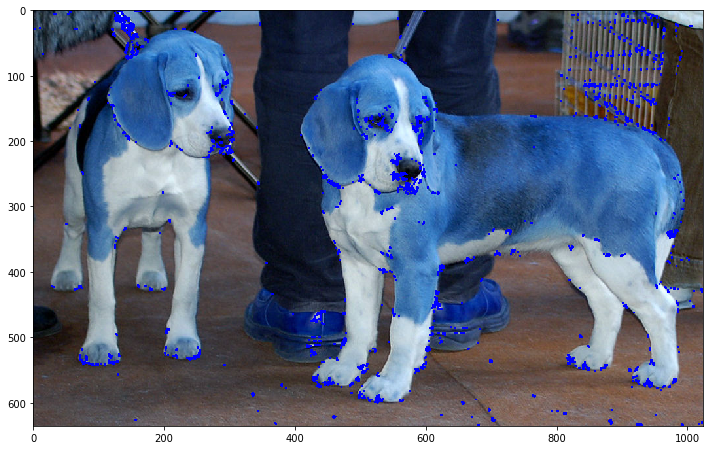

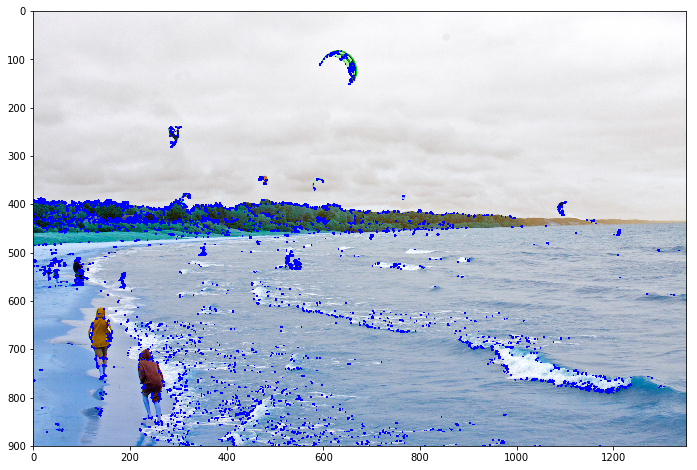

In [25]:
for image_path in TEST_IMAGE_PATHS:

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.001*dst.max()]=[0,0,255]

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(img)

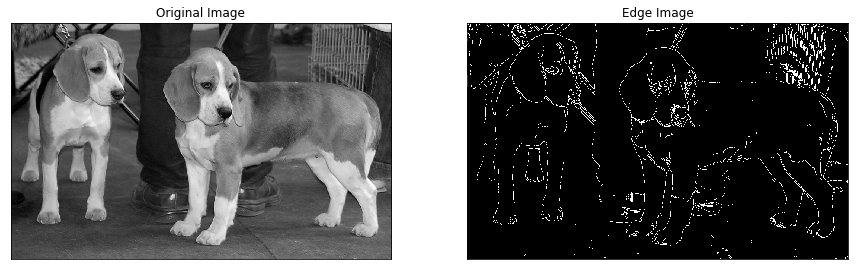

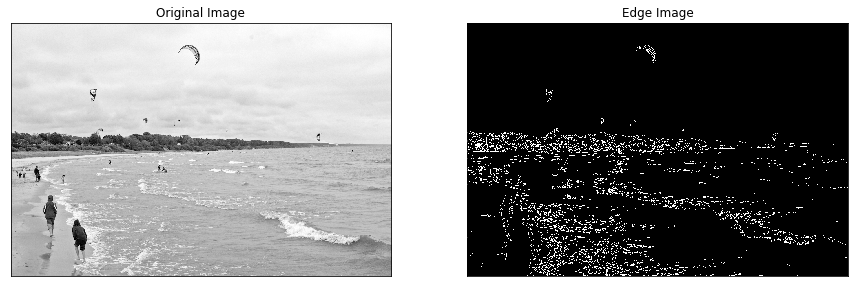

In [5]:
for image_path in TEST_IMAGE_PATHS:

    img = cv2.imread(image_path, 0)
    
    edges = cv2.Canny(img,100,200)
    plt.figure(figsize=(15,10))
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()